# Keras

User friendly interface to TensorFlow. Provides high level building blocks, so user needs to rarelly do operations directly on tensors.

In [ ]:
# Keras is part of a TensorFlow nowdays
from tensorflow import keras
import tensorflow as tf

## Model

You typically start with defining model. Model encapsulates sequence of layers and their settings.

#### Sequential

Only suitable for linear models.

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
# define model as sequential - input data will have one feature
model = Sequential()
# add layer with 12 perceptrons and relu activation function
model.add(keras.layers.Dense(12, input_shape=(1,), activation='relu'))
# output layer for regression
model.add(keras.layers.Dense(1))

In [ ]:
model.summary()

Probably need to install this to be able to run plotting
```
conda install graphviz
conda install pydot
conda install pydotplus
```

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

#### Functional

Different syntax, good also for complicated model structures with branching.

Starts with **Input** layer, then hidden layers and output layer. Input and output are then passed to Model.

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
# create Input layer - input data will have one feature without set batch size
# the comma is there just to tell Python it is a tuple
inputs = keras.layers.Input(shape=(1,))
# add layer with 12 perceptrons and relu activation function
x = keras.layers.Dense(12, activation='relu')(inputs)
# output layer for regression
outputs = keras.layers.Dense(1)(x)
# create model
func_model = Model(inputs = inputs, outputs = outputs)

In [ ]:
func_model.summary()

In [ ]:
tf.keras.utils.plot_model(func_model, show_shapes=True)

## Layers

Basic building blocks of neural networks - arrays of neurons stack together to capture complex problems.

Layer encapsulates state and computation to achieve a layer purpose in the network.
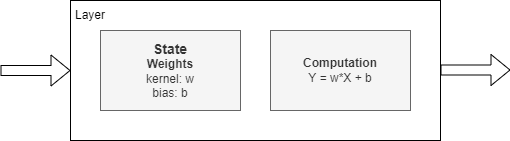

In Keras you typically define:
* Type of cells (or neurons)
* Number of cells
* Activation function
* Cell specific parameters (convolution window configuration for convolution layers)

### Most used types

##### Dense layer

Fully connected layers consisting of perceptrons.

In [ ]:
# layers are in layers module in keras
from tensorflow.keras.layers import Dense
Dense(units = 12, activation = 'relu')

##### Convolution layer

1D - 3D convolution layer.

In [ ]:
from tensorflow.keras.layers import Conv2D
Conv2D(filters = 128, kernel_size = (7,7), activation='relu')

##### RNN layer

Typically for time series data.

In [ ]:
from tensorflow.keras.layers import LSTM
LSTM(units = 128)

## Activation functions

Needed to add non-linearity. Without activation function we would only get linear transformation.

$f(x) = 2x + 3$

$g(x) = 5x - 1$

$f(g(x)) = 2(5x - 1) + 3 = 10x + 1$

* **ReLu** is the most common activation function for hidden layers - it has no maximum value, so it is not saturating around 0 and 1 like Sigmoid (respectively -1 and 1 like Tanh) and is fast to compute
* **Sigmoid** is mostly used in output layer for classification between two classes
* **Softmax** is used for multiclass classification

Layer without activation is used for example in last layer for regression tasks.

In [ ]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import relu, sigmoid, tanh
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
relu_activation = Activation(relu)
sigmoid_activation = Activation(sigmoid)
tanh_activation = Activation(tanh)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-5,5,100), relu_activation(np.linspace(-5,5,100)), linewidth=3, label="ReLu")
plt.plot(np.linspace(-5,5,100), sigmoid_activation(np.linspace(-5,5,100)), linewidth=3, linestyle = '--', label="Sigmoid")
plt.plot(np.linspace(-5,5,100), tanh_activation(np.linspace(-5,5,100)), linewidth=3, linestyle = 'dotted', label="Tanh")
plt.legend()
plt.grid(True)
plt.axis([-5, 5, -1, 1])
plt.show()

## Compiling model

After setting up model you need to compile the model. Keras will use backend engine. The backend automatically chooses the best way to represent the network for training and making predictions.

You need to specify:
* loss function
* optimizer

And optional
* metrics

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

## Loss function

Loss function is used to evaluate model. It should distil model performance into a single number that optimizer tries to minimize.

We can use multiple preset loss function or use custom one.

#### Regression problem:
* mean squared error
* mean absolute error

In [ ]:
model.compile(loss='mean_squared_error')

#### Binary classification problem:
* binary crossentropy

In [ ]:
model.compile(loss='binary_crossentropy')

#### Multi-Class Classification Problem:
* categorical_crossentropy for one hot encoded labels ([1,0,0], [0,1,0], [0,0,1])
* sparse_categorical_crossentropy for integer labels ([1], [2], [3]) - typically for values where order matters

In [ ]:
model.compile(loss='sparse_categorical_crossentropy')

## Optimizer

Defining stochastic gradient descent algorithm. There are multiple algorithms (SGD, RMSprop, Adam, ...).

Picking the algorithm is part of the model tuning, but usually it is a good to idea to start with Adam (it is fast and usually good performing).

In [ ]:
model.compile(optimizer='adam')

## Fitting the model

Actual training of the model. For training we need to specify:
* **epochs** - number of passes over entire training dataset
* **batch size** - number of samples before updating model weights, larger batches trains faster, but are typically also less accurate

In [ ]:
# imagine X are training data and y labels
history = model.fit(X, y, epochs=1000, batch_size=32)

## Prediction

Prediction is run by predict function.

In [ ]:
model.predict(X)

# Evaluation

Function evaluate evaluates model on whole provided dataset.

In [ ]:
score = model.evaluate(X_test, y_test) 

# Save the model

After training you can save the whole model, model structure or just trained weights.

In [ ]:
model.save('trained_model.hdf5')